## Ejercicio 2: Red de metro (Transporte)

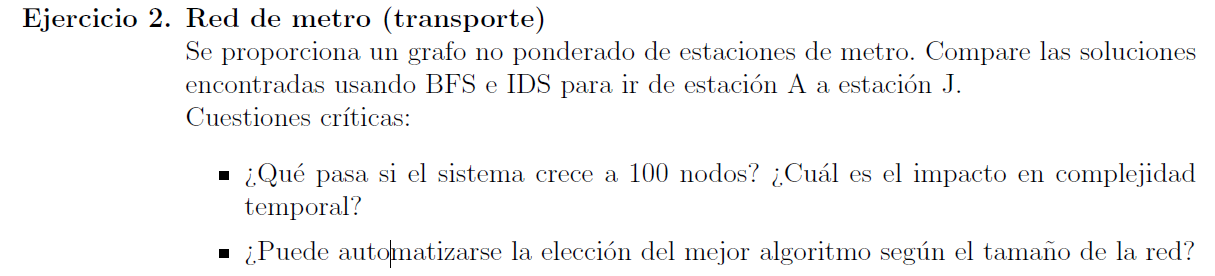

In [9]:
# Librerías necesarias
import networkx as nx
import matplotlib.pyplot as plt
from queue import PriorityQueue, Queue, LifoQueue
import time
import ast
import math
from collections import deque
from typing import Callable, Iterable, List, Tuple


# Nodo básico para búsqueda
class Node:
    def __init__(self, state, parent=None, action=None, path_cost=0):
        self.state = state
        self.parent = parent
        self.action = action
        self.path_cost = path_cost

    def __lt__(self, other):
        return self.path_cost < other.path_cost

    def solution(self):
        path, node = [], self
        while node:
            path.append(node.state)
            node = node.parent
        return list(reversed(path))

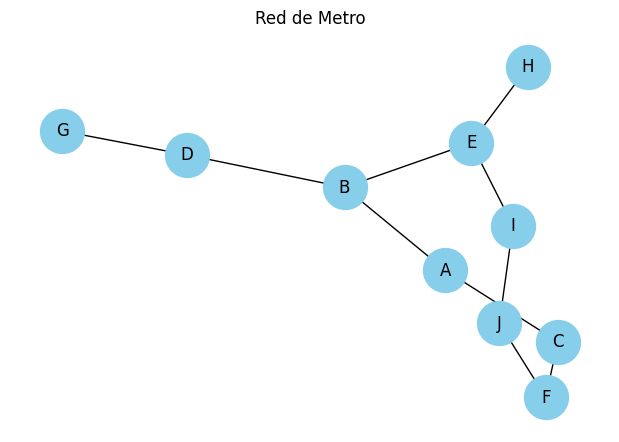

In [23]:
# Grafo de red de metro
G2 = nx.Graph()
edges2 = [('A','B'), ('A','C'), ('B','D'), ('B','E'), ('C','F'), ('D','G'), ('E','H'), ('E','I'), ('F','J'), ('I','J')]
G2.add_edges_from(edges2)

# Visualización
plt.figure(figsize=(6, 4))
pos = nx.spring_layout(G2)
nx.draw(G2, pos, with_labels=True, node_color='skyblue', node_size=1000)
plt.title("Red de Metro")
plt.show()

## Best First Search

In [22]:
def bfs_shortest_path(graph, start, goal):
    visited = set([start])
    queue = deque([[start]])  # store paths instead of just nodes

# Mientras haya caminos por explorar en la cola…
    while queue:
        # Saca de la cola el primer camino
        path = queue.popleft()     
        # Obtiene el último nodo de ese camino, que es el nodo actual que estamos explorando.
        node = path[-1]          
        # Si el nodo actual es el objetivo, devuelve el camino encontrado.
        if node == goal:
            return path  
        # Si no es el objetivo, explora los vecinos del nodo actual.
        # Para cada vecino que no ha sido visitado, crea un nuevo camino añadiendo
        # el vecino al camino actual y lo añade a la cola.
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                new_path = list(path)
                new_path.append(neighbor)
                queue.append(new_path)
    
    return None  # no path found

In [24]:
#Se implementa el algoritmo BFS para encontrar el camino más corto de 'A' a 'J'
elapsed1 = end_time - start_time
shortest = bfs_shortest_path(G2, 'A', 'J')
print("Shortest path:", shortest)
print("Elapsed time", elapsed1)

Shortest path: ['A', 'C', 'F', 'J']
Elapsed time 0.00026100012473762035


## Iterative Deepening Search

In [11]:
# Definición del límite de profundidad
def ids(start, is_goal: Callable[[object], bool],
        neighbors_fn: Callable[[object], Iterable[object]],
        max_depth: int = 10_000) -> List[object] | None:
    for depth_limit in range(max_depth + 1):
        found, path = dls(start, is_goal, neighbors_fn, depth_limit)
        if found:
            print(f"Shortest path (depth {len(path)-1}): {path}")
            return path
    return None

In [12]:
def dls(start, is_goal: Callable[[object], bool],
        neighbors_fn: Callable[[object], Iterable[object]],
        depth_limit: int) -> Tuple[bool, List[object] | None]:
    stack = [(start, iter(neighbors_fn(start)), 0)]
    path = [start]

    if is_goal(start):
        return True, path[:]  # copy

    while stack:
        node, it, depth = stack[-1]

        if depth == depth_limit:
            stack.pop()
            path.pop()
            continue

        try:
            nxt = next(it)
        except StopIteration:
            stack.pop()
            path.pop()
            continue

        if nxt in path:       # avoid cycles
            continue

        path.append(nxt)
        if is_goal(nxt):
            return True, path[:]  # copy

        stack.append((nxt, iter(neighbors_fn(nxt)), depth + 1))

    return False, None

In [13]:
def neighbors(n): return G2[n]
def is_goal(n): return n == 'J'

In [18]:
# Run IDS and print shortest path
start_time = time.perf_counter()
path = ids('A', is_goal, neighbors, max_depth=100)
end_time = time.perf_counter()

Shortest path (depth 3): ['A', 'C', 'F', 'J']


In [20]:
elapsed2 = end_time - start_time
print(f"Elapsed time: {elapsed2:.6f} seconds")
print("Result:", path)

Elapsed time: 0.000261 seconds
Result: ['A', 'C', 'F', 'J']


# Implementación de los algoritmos con un grafo ponderado, como alternativa de distancia

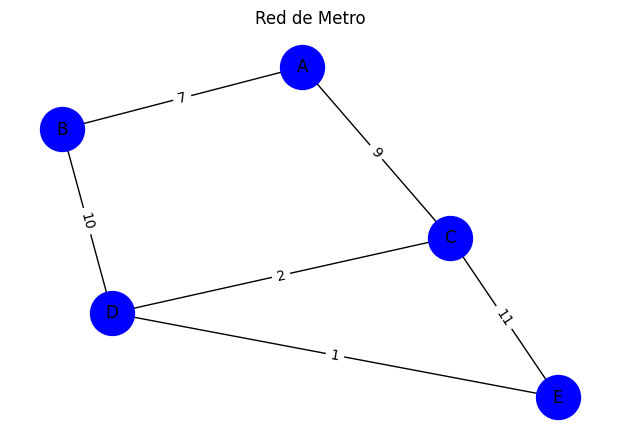

In [30]:
#Ejemplo profesor
# Grafo de ejemplo para logística
G3 = nx.Graph()
edges3 = [('A', 'B', 7), ('A', 'C', 9), ('B', 'D', 10), ('C', 'D', 2), ('C', 'E', 11), ('D', 'E', 1)]
G3.add_weighted_edges_from(edges3)

# Visualización
plt.figure(figsize=(6, 4))
pos = nx.spring_layout(G3)
nx.draw(G3, pos, with_labels=True, node_color='blue', node_size=1000)
labels = nx.get_edge_attributes(G3, 'weight')
nx.draw_networkx_edge_labels(G3, pos, edge_labels=labels)
plt.title("Red de Metro")
plt.show()